# Feature Matching

Feature matching extracts defining key features from an input image (using ideas from corner, edge and contour detection). Then using a distance calculation, finds all the matches in a secondary image. This means we are no longer required to have an exact copy of the target image.

We will checkout 3 methods
- Brute-Force matching with ORB Descriptors
- Brute-Force Matching with SIFT Descriptors and Ratio Test
- FLANN based matcher

## Brute-Force matching with ORB Descriptors

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

In [3]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)

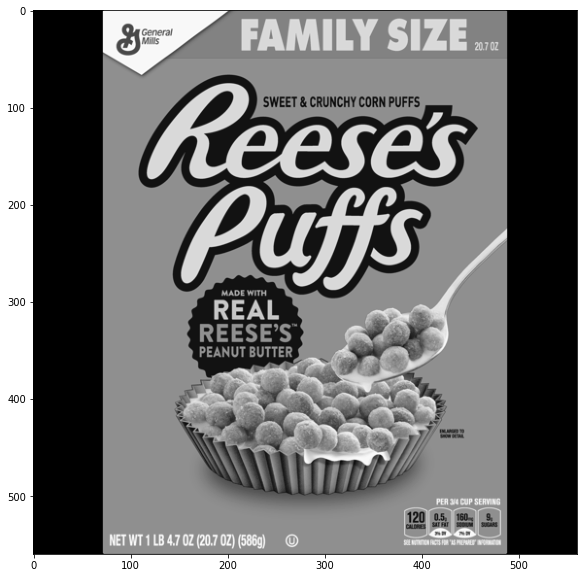

In [4]:
display(reeses)

In [7]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)

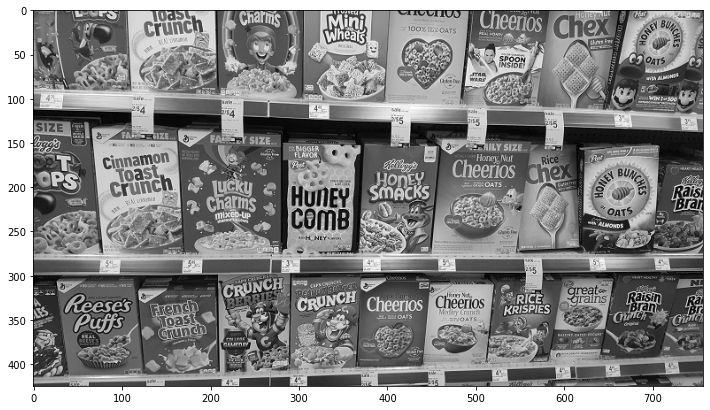

In [8]:
display(cereals)

In [9]:
orb = cv2.ORB_create()

In [10]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [11]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [12]:
matches = bf.match(des1, des2)

In [13]:
matches = sorted(matches, key=lambda x: x.distance)

In [14]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

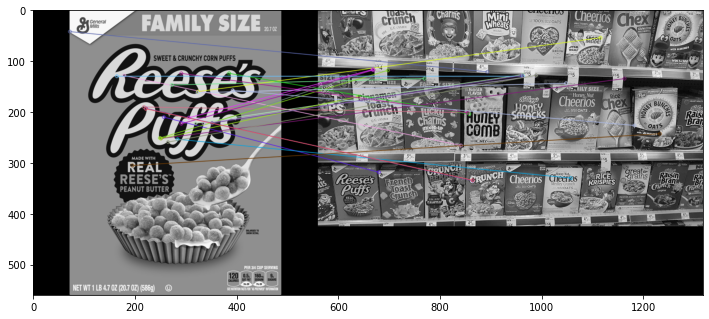

In [15]:
display(reeses_matches)

## Brute-Force Matching with SIFT Descriptors and Ratio Test

SIFT -> Scale Invariant Feature Transform

In [21]:
sift = cv2.SIFT_create()

In [22]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [23]:
bf = cv2.BFMatcher()

In [24]:
matches = bf.knnMatch(des1, des2, k=2)

In [25]:
matches

((< cv2.DMatch 0x1271856f0>, < cv2.DMatch 0x128b01050>),
 (< cv2.DMatch 0x128b01310>, < cv2.DMatch 0x128b00cb0>),
 (< cv2.DMatch 0x128b010d0>, < cv2.DMatch 0x128b011b0>),
 (< cv2.DMatch 0x128b01190>, < cv2.DMatch 0x128b00890>),
 (< cv2.DMatch 0x128b007b0>, < cv2.DMatch 0x128b01150>),
 (< cv2.DMatch 0x128b01290>, < cv2.DMatch 0x128b013d0>),
 (< cv2.DMatch 0x128b01430>, < cv2.DMatch 0x128b01450>),
 (< cv2.DMatch 0x128b01470>, < cv2.DMatch 0x128b01490>),
 (< cv2.DMatch 0x128b014b0>, < cv2.DMatch 0x128b014d0>),
 (< cv2.DMatch 0x128b014f0>, < cv2.DMatch 0x128b01510>),
 (< cv2.DMatch 0x128b01530>, < cv2.DMatch 0x128b01550>),
 (< cv2.DMatch 0x128b01570>, < cv2.DMatch 0x128b01590>),
 (< cv2.DMatch 0x128b015b0>, < cv2.DMatch 0x128b015d0>),
 (< cv2.DMatch 0x128b015f0>, < cv2.DMatch 0x128b01610>),
 (< cv2.DMatch 0x128b01630>, < cv2.DMatch 0x128b01650>),
 (< cv2.DMatch 0x128b01670>, < cv2.DMatch 0x128b01690>),
 (< cv2.DMatch 0x128b016b0>, < cv2.DMatch 0x128b016d0>),
 (< cv2.DMatch 0x128b016f0>, < 

In [26]:
good = []

# LESS DISTANCE == BETTER MATCH

for match1, match2 in matches:
    # IF MATCH1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, LET'S KEEP IT!
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [27]:
good

[[< cv2.DMatch 0x1271856f0>],
 [< cv2.DMatch 0x128b01f30>],
 [< cv2.DMatch 0x128b024f0>],
 [< cv2.DMatch 0x128b02530>],
 [< cv2.DMatch 0x128b02730>],
 [< cv2.DMatch 0x128b02d30>],
 [< cv2.DMatch 0x128b03030>],
 [< cv2.DMatch 0x128b031b0>],
 [< cv2.DMatch 0x128b03530>],
 [< cv2.DMatch 0x128b03770>],
 [< cv2.DMatch 0x128b03b30>],
 [< cv2.DMatch 0x128b03c30>],
 [< cv2.DMatch 0x128b8cef0>],
 [< cv2.DMatch 0x128b8cf30>],
 [< cv2.DMatch 0x128b8d030>],
 [< cv2.DMatch 0x128b8ddb0>],
 [< cv2.DMatch 0x128b8e730>],
 [< cv2.DMatch 0x128b8e7f0>],
 [< cv2.DMatch 0x128b8e8b0>],
 [< cv2.DMatch 0x128b8f130>],
 [< cv2.DMatch 0x128b8f270>],
 [< cv2.DMatch 0x128b903b0>],
 [< cv2.DMatch 0x128b904f0>],
 [< cv2.DMatch 0x128b90530>],
 [< cv2.DMatch 0x128b906f0>],
 [< cv2.DMatch 0x128b90730>],
 [< cv2.DMatch 0x128b91930>],
 [< cv2.DMatch 0x128b91ab0>],
 [< cv2.DMatch 0x128b91af0>],
 [< cv2.DMatch 0x128b920b0>],
 [< cv2.DMatch 0x128b921b0>],
 [< cv2.DMatch 0x128b92270>],
 [< cv2.DMatch 0x128b92830>],
 [< cv2.DM

In [28]:
len(good)

79

In [29]:
len(matches)

1501

In [30]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

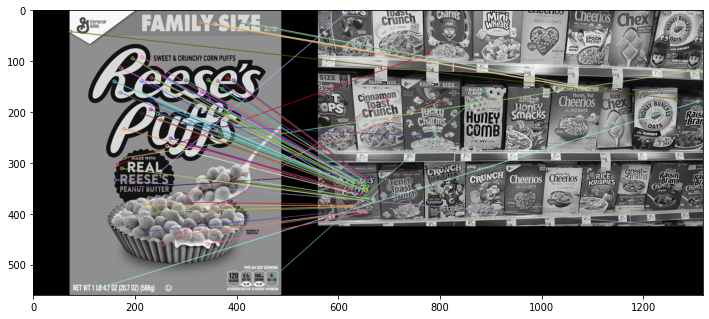

In [31]:
display(sift_matches)

## FLANN based matcher

FLANN -> Fast Library for Approximate Nearest Neighbours

In [60]:
sift = cv2.SIFT_create()

In [61]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [62]:
# FLANN

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [63]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [64]:
matches = flann.knnMatch(des1, des2, k=2)

In [65]:
good = []

# LESS DISTANCE == BETTER MATCH

for match1, match2 in matches:
    # IF MATCH1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, LET'S KEEP IT!
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [68]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

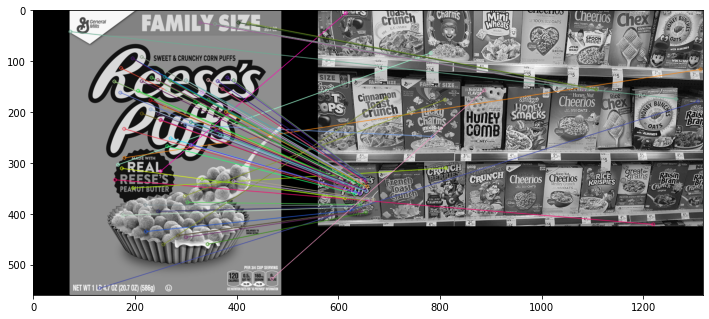

In [69]:
display(flann_matches)

### Deciding Colors

In [70]:
sift = cv2.SIFT_create()

In [71]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [72]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [73]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [74]:
matches = flann.knnMatch(des1, des2, k=2)

In [75]:
matchesMask = [[0, 0] for i in range(len(matches))]

In [76]:
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        matchesMask[i] = [1, 0]

In [77]:
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask, flags=0)

In [79]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

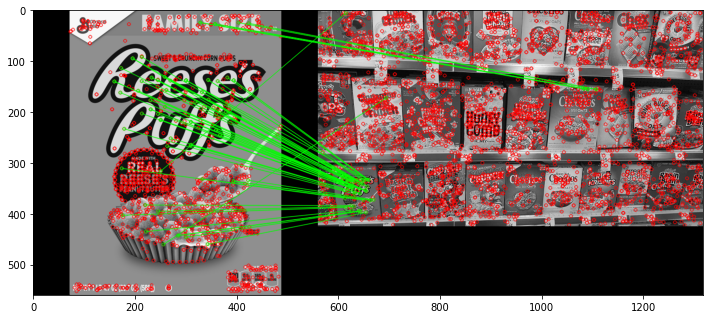

In [80]:
display(flann_matches)